# Combined data frame visualization

In [52]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [53]:
df_matches = pd.read_csv('./data/matches.csv')
df_deliveries = pd.read_csv('./data/deliveries.csv')


# data processin and cleaning


In [54]:
df_matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
df_deliveries.fillna(0,inplace=True)    

# 1 . Total Matches Played vs Lost

 Total matches lost by each team vs total played



In [55]:
matches_played_byteams=pd.concat([df_matches['team1'],df_matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=df_matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.head()

Team  Total Matches  wins
0               Mumbai Indians            157    92
1  Royal Challengers Bangalore            152    79
2        Kolkata Knight Riders            148    77
3              Kings XI Punjab            148    73
4             Delhi Daredevils            147    70

In [56]:
matches_played_byteams['loss']= matches_played_byteams['Total Matches'].sub(matches_played_byteams['wins'], axis=0)

In [57]:
matches_played_byteams.head()

Team  Total Matches  wins  loss
0               Mumbai Indians            157    92    65
1  Royal Challengers Bangalore            152    79    73
2        Kolkata Knight Riders            148    77    71
3              Kings XI Punjab            148    73    75
4             Delhi Daredevils            147    70    77

In [58]:
matches_played_byteams.set_index('Team',inplace=True)

In [59]:
trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['loss'],
    name='Matches Lost'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

# 2. How many times a bowler got a batsman OUT

In [60]:
bowler_batsman = df_deliveries[['bowler','batsman','player_dismissed']]
df_bowler_temp = pd.DataFrame(data=bowler_batsman)
df_bowler_temp.head()
df_bowler_temp.shape

(150460, 3)

In [61]:
df_bowler_temp = df_bowler_temp[df_bowler_temp.player_dismissed != 0]
df_bowler_temp.shape
df_bowler_temp.head(20)

bowler        batsman player_dismissed
11    A Choudhary      DA Warner        DA Warner
64      STR Binny       S Dhawan         S Dhawan
94      YS Chahal   MC Henriques     MC Henriques
116      TS Mills   Yuvraj Singh     Yuvraj Singh
160   Rashid Khan  Mandeep Singh    Mandeep Singh
165      DJ Hooda       CH Gayle         CH Gayle
199  MC Henriques      KM Jadhav        KM Jadhav
206   Rashid Khan        TM Head          TM Head
211  Bipul Sharma    Sachin Baby      Sachin Baby
230       B Kumar      STR Binny        STR Binny
234       A Nehra      SR Watson        SR Watson
235       A Nehra      S Aravind        S Aravind
242       B Kumar       TS Mills         TS Mills
247   BCJ Cutting    A Choudhary        YS Chahal
274   Imran Tahir       PA Patel         PA Patel
287   Imran Tahir      RG Sharma        RG Sharma
289   Imran Tahir     JC Buttler       JC Buttler
316      R Bhatia      AT Rayudu        AT Rayudu
330      R Bhatia      KH Pandya        KH Pandya
343       A Zampa         N Rana           N Rana

In [62]:
df_bowler_batsman= pd.DataFrame({'count' : df_bowler_temp.groupby( [ "bowler", "batsman"] ).size()}).reset_index()
df_bowler_batsman.head(10)

bowler         batsman  count
0  A Ashish Reddy       DJG Sammy      1
1  A Ashish Reddy       G Gambhir      1
2  A Ashish Reddy    JEC Franklin      1
3  A Ashish Reddy     LRPL Taylor      1
4  A Ashish Reddy  M Muralitharan      1
5  A Ashish Reddy      MA Agarwal      1
6  A Ashish Reddy      MN Samuels      1
7  A Ashish Reddy        MS Dhoni      2
8  A Ashish Reddy   Mandeep Singh      1
9  A Ashish Reddy         N Saini      1

In [63]:

df_bowler_batsman_group= df_bowler_temp.groupby( [ "bowler", "batsman"] ).count()
df_bowler_batsman_group.head(100)

player_dismissed
bowler         batsman                          
A Ashish Reddy DJG Sammy                       1
               G Gambhir                       1
               JEC Franklin                    1
               LRPL Taylor                     1
               M Muralitharan                  1
               MA Agarwal                      1
               MN Samuels                      1
               MS Dhoni                        2
               Mandeep Singh                   1
               N Saini                         1
               R Vinay Kumar                   1
               RA Jadeja                       1
               RV Uthappa                      3
               V Kohli                         2
               Yuvraj Singh                    1
A Chandila     AP Majumdar                     1
               CL White                        1
               JD Ryder                        1
               M Vijay                         1
               Mandeep Singh                   1
               NLTC Perera                     1
               PA Reddy                        1
               RT Ponting                      1
               RV Uthappa                      1
               SC Ganguly                      1
               SR Tendulkar                    1
A Choudhary    DA Warner                       1
               HM Amla                         1
               MM Sharma                       1
               PA Patel                        1
...                                          ...
A Kumble       Y Nagar                         1
               Y Venugopal Rao                 1
               YK Pathan                       1
               Yuvraj Singh                    1
A Mishra       A Mithun                        1
               A Singh                         1
               A Symonds                       3
               A Zampa                         1
               AA Bilakhia                     1
               AA Jhunjhunwala                 1
               AB Dinda                        1
               AB de Villiers                  1
               AC Gilchrist                    2
               AC Voges                        1
               AD Mathews                      1
               AD Russell                      1
               AL Menaria                      1
               AM Nayar                        1
               AM Rahane                       3
               AS Raut                         1
               AT Rayudu                       3
               AUK Pathan                      1
               Azhar Mahmood                   2
               B Kumar                         1
               BJ Hodge                        1
               CL White                        1
               CR Woakes                       1
               DA Miller                       1
               DA Warner                       2
               DB Ravi Teja                    1

[100 rows x 1 columns]

# 3. Top 20 players with most Man of Matches

In [64]:
plt.subplots(figsize=(10,6))
ax = df_matches['player_of_match'].value_counts().head(20).plot.bar(width=.8, color='B')  
ax.set_xlabel('player of the match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

# 4. How many time each team has won by defending

In [65]:
# to remove draws
df_matches = df_matches[df_matches['win_by_runs'] != df_matches['win_by_wickets']]

In [66]:
df_win_by_runs = df_matches[['winner','win_by_wickets']]
df_win_by_runs = pd.DataFrame(data=df_win_by_runs)
df_win_by_runs = df_win_by_runs[df_win_by_runs.win_by_wickets == 0]
df_output= pd.DataFrame({'count' : df_win_by_runs.groupby( ["winner"] ).size()}).reset_index()
df_output.head()

winner  count
0  Chennai Super Kings     46
1      Deccan Chargers     18
2     Delhi Daredevils     21
3        Gujarat Lions      1
4      Kings XI Punjab     32

In [67]:
data = [go.Bar(
            x= df_output['winner'],
            y= df_output['count']
    )]
py.iplot(data, filename='basic-bar')

# 5. How many time each team has won by Chasing¶

In [68]:
df_win_by_wickets = df_matches[['winner','win_by_runs']]
df_win_by_wicktes = pd.DataFrame(data=df_win_by_wickets)
df_win_by_wickets = df_win_by_wickets[df_win_by_wickets.win_by_runs == 0]
df_output_chase= pd.DataFrame({'count' : df_win_by_wickets.groupby( ["winner"] ).size()}).reset_index()
df_output_chase.head()

winner  count
0  Chennai Super Kings     33
1      Deccan Chargers     11
2     Delhi Daredevils     41
3        Gujarat Lions     12
4      Kings XI Punjab     36

In [69]:
data = [go.Bar(
            x= df_output_chase['winner'],
            y= df_output_chase['count']
    )]
py.iplot(data, filename='basic-bar')

# 6. Batman who got out by LBW

In [70]:
df_batsman_dismissed = df_deliveries[['player_dismissed','dismissal_kind']]
df_batsman_dismissed = pd.DataFrame(data=df_batsman_dismissed)
df_batsman_dismissed = df_batsman_dismissed[df_batsman_dismissed.dismissal_kind == 'lbw']
df_output_dismissed= pd.DataFrame({'count' : df_batsman_dismissed.groupby( ["player_dismissed"] ).size()}).reset_index()
df_output_dismissed.head(100)

player_dismissed  count
0          A Chopra      1
1          A Mishra      1
2       AA Bilakhia      2
3         AB Barath      1
4          AB Dinda      1
5    AB de Villiers      6
6      AC Gilchrist      4
7        AD Mathews      2
8           AD Nath      1
9          AJ Finch      3
10         AM Nayar      5
11        AM Rahane      6
12         AR Patel      1
13          AS Raut      1
14        AT Rayudu      3
15       AUK Pathan      1
16    Azhar Mahmood      3
17          B Akhil      1
18         B Chipli      1
19          B Kumar      1
20       BAW Mendis      1
21      BB McCullum     16
22     BB Samantray      1
23         BJ Hodge      6
24  C de Grandhomme      1
25          CA Lynn      1
26        CA Pujara      1
27         CH Gayle      7
28        CH Morris      1
29      CJ Anderson      1
..              ...    ...
70       KA Pollard      5
71    KC Sangakkara      2
72       KD Karthik     10
73          KK Nair      6
74         KL Rahul      2
75        KM Jadhav      2
76     KP Pietersen      2
77    KS Williamson      1
78        KV Sharma      1
79         L Balaji      2
80    LA Carseldine      1
81      LMP Simmons      3
82        LR Shukla      2
83      LRPL Taylor      5
84           M Kaif      1
85        M Klinger      1
86   M Muralitharan      1
87          M Vijay      9
88          M Vohra      4
89       MA Agarwal      2
90     MC Henriques      2
91        MC Juneja      1
92        MD Mishra      3
93      MDKJ Perera      1
94       MEK Hussey      2
95        MJ Clarke      2
96       MJ Guptill      1
97          MJ Lumb      1
98        MK Pandey      4
99        MK Tiwary      7

[100 rows x 2 columns]

In [71]:
data = [go.Bar(
            x= df_output_dismissed['player_dismissed'],
            y= df_output_dismissed['count']
    )]
py.iplot(data, filename='basic-bar')

# 7. Bowlers who got wickets through LBW

In [72]:
df_bowler_lbw = df_deliveries[['bowler','dismissal_kind']]
df_bowler_lbw = pd.DataFrame(data=df_bowler_lbw)
df_bowler_lbw = df_bowler_lbw[df_bowler_lbw.dismissal_kind == 'lbw']
df_output_lbw= pd.DataFrame({'count' : df_bowler_lbw.groupby( ["bowler"] ).size()}).reset_index()
df_output_lbw.head(100)

bowler  count
0      A Ashish Reddy      3
1            A Kumble      4
2            A Mishra     13
3             A Nehra      5
4             A Singh      1
5           A Symonds      2
6            A Uniyal      1
7             A Zampa      1
8           AA Chavan      2
9            AB Dinda      3
10     AD Mascarenhas      1
11         AD Mathews      1
12         AD Russell      3
13         AG Murtaza      2
14           AM Salvi      1
15           AN Ahmed      1
16         AS Rajpoot      2
17        Anand Rajan      1
18       Ankit Sharma      2
19         Ankit Soni      1
20      Azhar Mahmood      4
21            B Kumar      7
22           BA Bhatt      2
23         BAW Mendis      1
24      BW Hilfenhaus      1
25       Basil Thampi      4
26       Bipul Sharma      1
27    C de Grandhomme      1
28           CH Gayle      2
29          CH Morris      3
..                ...    ...
70       KP Pietersen      1
71          KV Sharma      6
72      KW Richardson      1
73      Kuldeep Yadav      2
74           L Balaji      1
75          LR Shukla      2
76           M Ashwin      1
77           M Kartik      3
78           M Morkel      2
79     M Muralitharan      9
80           MA Starc      2
81       MC Henriques      1
82        MF Maharoof      2
83         MG Johnson      1
84     MJ McClenaghan      3
85           MM Patel      4
86          MM Sharma      4
87           MR Marsh      1
88            MS Gony      1
89     Mohammed Shami      2
90  Mustafizur Rahman      1
91        NLTC Perera      1
92    NM Coulter-Nile      2
93            P Awana      1
94            P Kumar      5
95             P Sahu      1
96        PC Valthaty      1
97         PJ Sangwan      1
98          PP Chawla     15
99            PP Ojha      5

[100 rows x 2 columns]

In [73]:
data = [go.Bar(
            x= df_output_lbw['bowler'],
            y= df_output_lbw['count']
    )]
py.iplot(data, filename='basic-bar')

# 8. How many runs each bowler has conceived for a batsman

In [74]:
bowler_batsman = df_deliveries[['bowler','batsman','total_runs']]
df_bowler_temp = pd.DataFrame(data=bowler_batsman)
df_bowler_temp.head()
df_bowler_temp.shape

(150460, 3)

In [75]:
df_bowler_batsman= pd.DataFrame(df_bowler_temp.groupby( [ "bowler", "batsman"] )['total_runs'].sum())
df_bowler_batsman.head(10)

total_runs
bowler         batsman                   
A Ashish Reddy AB de Villiers          48
               AC Thomas               10
               AD Mathews               3
               AD Russell               1
               AL Menaria               9
               AM Nayar                 7
               AM Rahane                1
               AT Rayudu                5
               Azhar Mahmood           12
               CH Gayle                 1

# Is Toss Winner A Match Winner?

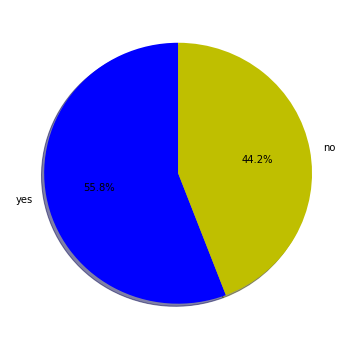

In [76]:
df=df_matches[df_matches['toss_winner']==df_matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['b','y'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()